# Computer vision - Laboratory

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing
2. Edge detection

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

In [58]:
#imports de la practica
from skimage import io
from skimage import img_as_float
from matplotlib import pyplot as plt
from skimage.color import rgb2gray

from skimage import exposure
import numpy as np

from skimage.filters import sobel, prewitt, roberts
from skimage.feature import canny

from scipy import ndimage
from skimage.transform import resize

import scipy

### 2.1 Image processing with different scales and filters

a) Read the image "face.png" and analyse its histogram. What is the histogram representing for an image?

- Visualize the R, G, and B channels of the image.

- Visualize the histogram of a color image with the following characteristics:

    - Obtain the histogram with 8, 32, 64 and 256 bins. 

    - Visualize the histogram of each channel and the gray level image and compare them. Comment their difference (see image bellow as an example of histogram extraction).

Note: What type should be the image in order to compute the histogram? check using different bins for the histogram. 

Hint : the `exposure` module within the `skimage` library makes the histogram extraction easy!

Help: [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_for_notebook/ex21a.png'>

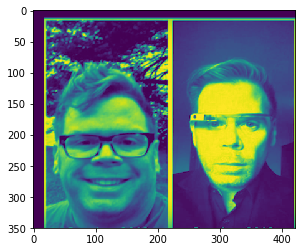

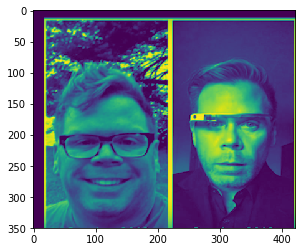

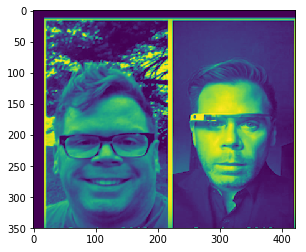

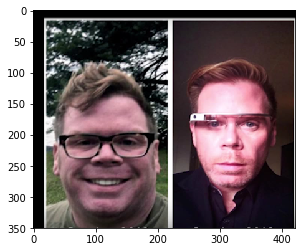

In [5]:
face = io.imread('images/face.png')

faceR = face.copy()
faceG = face.copy()
faceB = face.copy()

faceR = img_as_float(faceR[:,:,0])
faceG = img_as_float(faceG[:,:,1])
faceB = img_as_float(faceB[:,:,2])

plt.imshow(faceR)
plt.show()

plt.imshow(faceG)
plt.show()

plt.imshow(faceB)
plt.show()

plt.imshow(face)
plt.show()

In [16]:
face = io.imread('images/face.png')

face_gray = face.copy()
faceR = face.copy()
faceG = face.copy()
faceB = face.copy()

face_gray = rgb2gray(face)
faceR = img_as_float(faceR[:,:,0])
faceG = img_as_float(faceG[:,:,1])
faceB = img_as_float(faceB[:,:,2])

def histograma_(nbins_in):
    hist_gray, bins_gray = exposure.histogram(face_gray, nbins = nbins_in)
    hist_r, bins_r = exposure.histogram(faceR,nbins = nbins_in)
    hist_g, bins_g = exposure.histogram(faceG,nbins = nbins_in)
    hist_b, bins_b = exposure.histogram(faceB,nbins = nbins_in)
    
    fig,ax = plt.subplots(figsize=(10,2))
    ind = np.arange(nbins_in)
    width = 0.2
    
    rects_gray = ax.bar(ind, hist_gray, width, color='y')
    rects_r = ax.bar(ind + width, hist_r, width, color ='r')
    
    rects_g = ax.bar(ind + 2 * width, hist_g, width, color = 'g')

    rects_b = ax.bar(ind + 3 * width, hist_b, width, color = 'b')
    
    ax.legend((rects_gray[0], rects_r[0], rects_g[0], rects_b[0]), ('Gray','Red','Green','Blue'))
    ax.set_title('Histogram with '+str(nbins_in)+'nbins')
    plt.show()

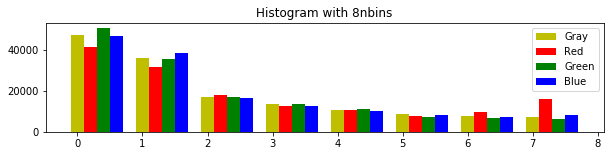

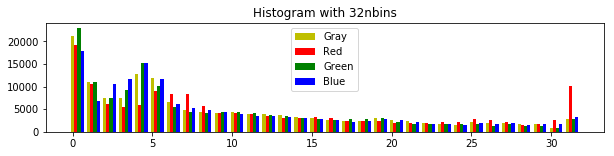

In [17]:
histograma_(8)
histograma_(32)

b) Read the image `face.png` (a) and convolve it with a horizontal mask `mask_h1d=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]`(b). Later, substract the obtained image to the original one and save the new image (c). 

***To make your code legible, the resulted images should be shown in a 3x1 plot, with the following titles: a) 'Original image', b) 'Convolved image' and c) 'Difference with the original image'***

Hint: the `convolve` command belongs to the library `ndimage` of `scipy`. 

- Observe and comment how the ***type*** and the ***range of values (max & min)*** changed when different operations have been applied on the image. 

- Plot the different images ((a)original image, (b)intermediate and (c)final) on a figure with multiple images. Put titles on the image plots to explain what each image represents. Is the type of the mask important for the convolution? How is the image changed after the convolution? You need to repeat several times the convolution. Moreover, you need to also use bigger masks in order to observe better the effect of it. Present at least 5 experiments commenting the results obtained and their differences.

Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without values range rescaling.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

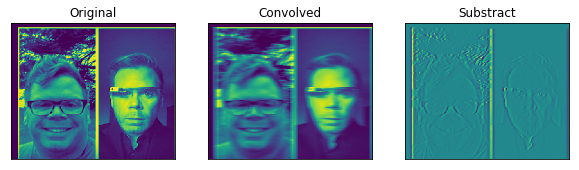

In [43]:
face = io.imread('images/face.png')

face_gray = rgb2gray(face)

mask_h1d=np.ones((1,15))/15
convolved = ndimage.convolve(face_gray,mask_h1d)
substract = face_gray-convolved

f, axarr = plt.subplots(1,3)
f.set_size_inches(10,10)

axarr[0].imshow(face_gray)
axarr[0].set_title('Original')
axarr[0].xaxis.set_visible(False)
axarr[0].yaxis.set_visible(False)

axarr[1].imshow(convolved)
axarr[1].set_title('Convolved')
axarr[1].xaxis.set_visible(False)
axarr[1].yaxis.set_visible(False)

axarr[2].imshow(substract)
axarr[2].set_title('Substract')
axarr[2].xaxis.set_visible(False)
axarr[2].yaxis.set_visible(False)

plt.show()

c) Convolve the image with a vertical one-dimensional mask. Compute and visualize the 3 images (a,b,c).

- Extract the image's histograms and visualize them. 

- Compare the results with those of the previous exercise.

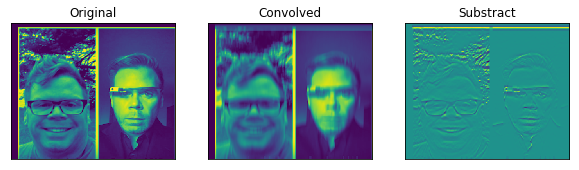

In [46]:
mask_h1d_vert=np.ones((15,1))/15
convolved_vert = ndimage.convolve(face_gray,mask_h1d_vert)
substract_vert = face_gray-convolved_vert

f, axarr = plt.subplots(1,3)
f.set_size_inches(10,10)

axarr[0].imshow(face_gray)
axarr[0].set_title('Original')
axarr[0].xaxis.set_visible(False)
axarr[0].yaxis.set_visible(False)

axarr[1].imshow(convolved_vert)
axarr[1].set_title('Convolved')
axarr[1].xaxis.set_visible(False)
axarr[1].yaxis.set_visible(False)

axarr[2].imshow(substract_vert)
axarr[2].set_title('Substract')
axarr[2].xaxis.set_visible(False)
axarr[2].yaxis.set_visible(False)

plt.show()

d) Convolve the original image with a uniform `two-dimensional` mask of dimensions 15x15 and with all values set to 1. Compute and visualize the 3 images (a,b,c).

- Extract the image's histograms and visualize them. 

- Compare the results with those of the previous exercise.

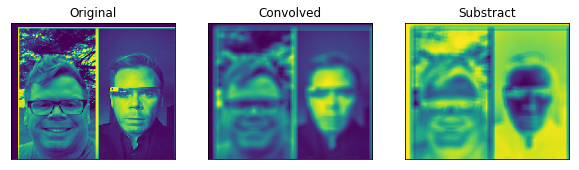

In [47]:
mask_h1d_2D=np.ones((15,15))/15
convolved_2D = ndimage.convolve(face_gray,mask_h1d_2D)
substract_2D = face_gray-convolved_2D

f, axarr = plt.subplots(1,3)
f.set_size_inches(10,10)

axarr[0].imshow(face_gray)
axarr[0].set_title('Original')
axarr[0].xaxis.set_visible(False)
axarr[0].yaxis.set_visible(False)

axarr[1].imshow(convolved_2D)
axarr[1].set_title('Convolved')
axarr[1].xaxis.set_visible(False)
axarr[1].yaxis.set_visible(False)

axarr[2].imshow(substract_2D)
axarr[2].set_title('Substract')
axarr[2].xaxis.set_visible(False)
axarr[2].yaxis.set_visible(False)

plt.show()

e) Can we convolve a color image? 

Implement a 3-channel filter, apply it, visualize the 3 images (a, b and c) and comment the results obtained.

Which is the result obtained when applying a single-channel filter channel by channel separately? Visualize again the three images (original, convolved and difference) and compare the results.

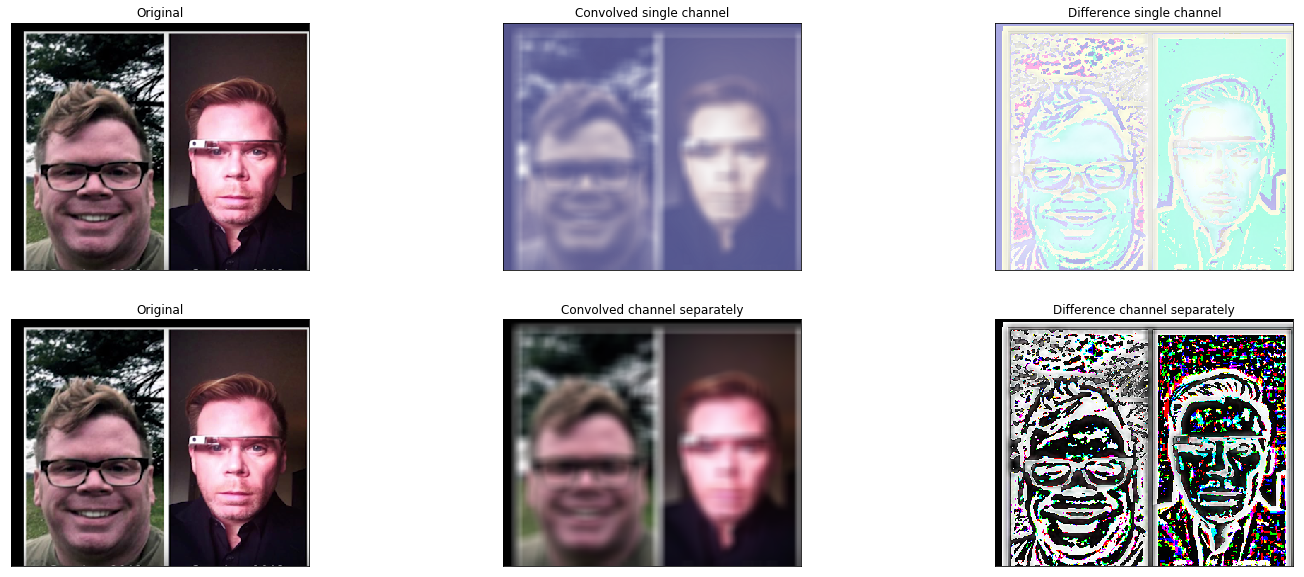

In [50]:
#Original img
face = io.imread('images/face.png')

#Vertical 1D mask
mask=np.ones((15,15,3))/675

#Imatge convolved
convolved = ndimage.convolve(face, mask)

#Imatge diferencia
substraction = face - convolved

############################

#Channel by channel mask
maskCbC=np.ones((15,15))/225

#Imatge convolved each channel
convolvedR = ndimage.convolve(face[:,:,0], maskCbC)
convolvedG = ndimage.convolve(face[:,:,1], maskCbC)
convolvedB = ndimage.convolve(face[:,:,2], maskCbC)
convolved4 = ndimage.convolve(face[:,:,3], maskCbC)

convolvedRGB = np.ndarray(face.shape, dtype='uint8')

convolvedRGB[:,:,0] = convolvedR
convolvedRGB[:,:,1] = convolvedG
convolvedRGB[:,:,2] = convolvedB
convolvedRGB[:,:,3] = convolved4

substractionRGB = face - convolvedRGB
substractionRGB[:,:,3] = face[:,:,3]

f, axarr = plt.subplots(2,3)
f.set_size_inches(25,10)

axarr[0][0].imshow(face)
axarr[0][0].set_title('Original')
axarr[0][0].xaxis.set_visible(False)
axarr[0][0].yaxis.set_visible(False)
axarr[0][1].imshow(convolved,cmap='gray')
axarr[0][1].set_title('Convolved single channel')
axarr[0][1].xaxis.set_visible(False)
axarr[0][1].yaxis.set_visible(False)
axarr[0][2].imshow(substraction, cmap='gray')
axarr[0][2].set_title('Difference single channel')
axarr[0][2].xaxis.set_visible(False)
axarr[0][2].yaxis.set_visible(False)

axarr[1][0].imshow(face)
axarr[1][0].set_title("Original")
axarr[1][0].xaxis.set_visible(False)
axarr[1][0].yaxis.set_visible(False)
axarr[1][1].imshow(convolvedRGB)
axarr[1][1].set_title("Convolved channel separately")
axarr[1][1].xaxis.set_visible(False)
axarr[1][1].yaxis.set_visible(False)
axarr[1][2].imshow(substractionRGB)
axarr[1][2].set_title("Difference channel separately")
axarr[1][2].xaxis.set_visible(False)
axarr[1][2].yaxis.set_visible(False)

plt.show()

In [51]:
#Podem veure que al convolusionar els 3 canals a la vegada obtenim una imatge difuminada, pero com si tingues un filtre blau
#En canvi, aplicant la mascara canal per canal, obtenim el mateix difuminat pero sense cap filtre blau, aixi que 
#podem dir que per conseguir la imatge convolusionada, es millor fer-ho canal per canal

#Al fer la diferencia tenim resultats molt variats... Podem veure que conseguim el color blanc als llocs amb menys difuminats,
#es a dir, al perfil de les cares. Tambe podem observar colors molt mes foscos al aplicar la mascara canal per canal, uns 
#constrastos mes forts que permeten distingir millor les cares.

Given a color image (im), what is the difference between ***a*** and ***b*** ?
   
*** a) ***

im_2=np.array(im, dtype='float')


*** b) ***

im_2=np.array(im)


im_2=img_as_float(im_2)

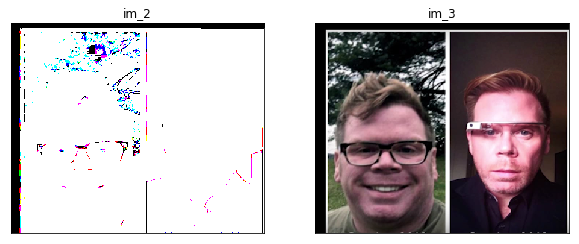

In [49]:
face = io.imread('images/face.png')
im_2=np.array(face, dtype='float')

im_3=np.array(face)
im_3=img_as_float(im_3)

f, axarr = plt.subplots(1,2)
f.set_size_inches(10,10)
axarr[0].imshow(im_2)
axarr[0].set_title('im_2')
axarr[0].xaxis.set_visible(False)
axarr[0].yaxis.set_visible(False)

axarr[1].imshow(im_3)
axarr[1].set_title('im_3')
axarr[1].xaxis.set_visible(False)
axarr[1].yaxis.set_visible(False)
plt.show()


#Tal i com podem veure a continuacio, el fet de crear o "convertir" l'imatge amb enters flotants de 64 bits DIRECTAMENT
#provoca una perdua o malinterpretacio de colors. Aixo es degut perque els floats de skimage son entre -1 i 1. Al fer
#dtype=float estas forçant els valors de l'imatge a que siguin flotants, es a dir, si l'imatge te un "84", fara "84.0".
#En canvi, si ho fas com l'imatge 3, si que transforma realment els valors entre -1 i 1 (Dividint per 255)

f) Change the size of the image a) reducing it 10 times ***and*** b) augmenting it two times. 

Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment what happens and why. 

Apply the convolution on the three images with the same two dimensional uniform mask and comment the results.
Note: Observe what is the output of the command `resize`.


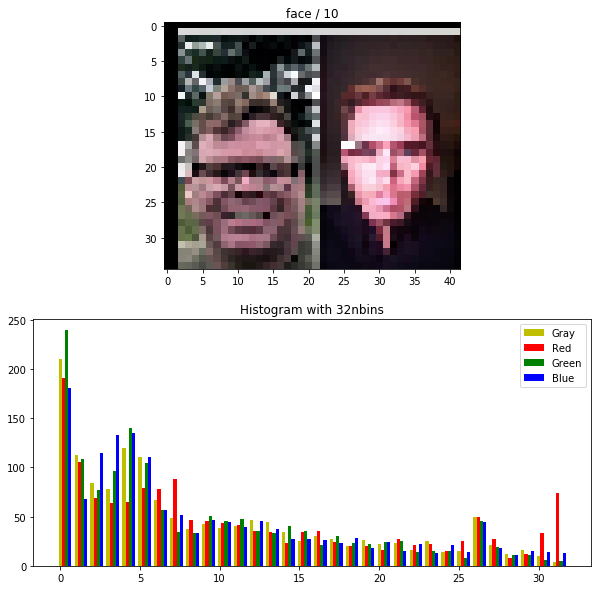

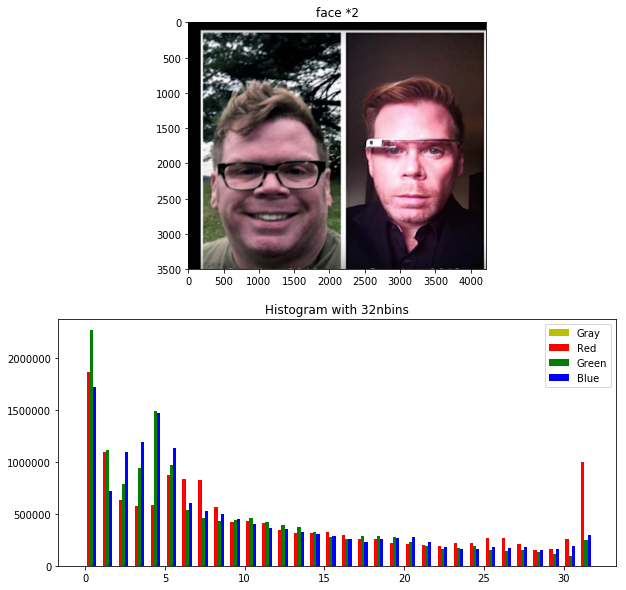

In [55]:
face = io.imread('images/face.png')
#Fem l'imatge 10 vegades mes petita
shape = (face.shape[0]/10,int(face.shape[1]/10),face.shape[2]) #Creem la shape
face_resized = resize(face, shape, mode='reflect')


#Fem l'imatge 2 vegades mes gran
shape = (face.shape[0]*10,int(face.shape[1]*10),face.shape[2]) #Creem la shape
faceGran_resized = resize(face, shape, mode='reflect')


#Creem el seu histograma
nbins_in = 32

face_gray = face_resized.copy()
faceR = face_resized.copy()
faceG = face_resized.copy()
faceB = face_resized.copy()

face_gray = rgb2gray(face_gray)
faceR = img_as_float(faceR[:,:,0])
faceG = img_as_float(faceG[:,:,1])
faceB = img_as_float(faceB[:,:,2])

hist_gray, bins_gray = exposure.histogram(face_gray, nbins = nbins_in)
hist_r, bins_r = exposure.histogram(faceR, nbins = nbins_in)
hist_g, bins_g = exposure.histogram(faceG, nbins = nbins_in)
hist_b, bins_b = exposure.histogram(faceB, nbins = nbins_in)


#############Un altre histograma#############
faceGran_gray = faceGran_resized.copy()
faceGranR = faceGran_resized.copy()
faceGranG = faceGran_resized.copy()
faceGranB = faceGran_resized.copy()

faceGran_gray = rgb2gray(faceGran_gray)
faceGranR = img_as_float(faceGranR[:,:,0])
faceGranG = img_as_float(faceGranG[:,:,1])
faceGranB = img_as_float(faceGranB[:,:,2])

hist_grayfaceGran, bins_grayfaceGran = exposure.histogram(face_gray, nbins = nbins_in)
hist_rfaceGran, bins_rfaceGran = exposure.histogram(faceGranR, nbins = nbins_in)
hist_gfaceGran, bins_gfaceGran = exposure.histogram(faceGranG, nbins = nbins_in)
hist_bfaceGran, bins_bfaceGran = exposure.histogram(faceGranB, nbins = nbins_in)

fig,ax = plt.subplots(2,1,figsize=(10,10))

#Casa petita

ax[0].imshow(face_resized)
ax[0].set_title('face / 10')

#Definim l'histograma casa petita

ind = np.arange(nbins_in)
width = 0.2

rects_gray = ax[1].bar(ind, hist_gray, width, color='y')
rects_r = ax[1].bar(ind + width, hist_r, width, color ='r')

rects_g = ax[1].bar(ind + 2 * width, hist_g, width, color = 'g')

rects_b = ax[1].bar(ind + 3 * width, hist_b, width, color = 'b')

#Mostrem l'histograma casa petita

ax[1].legend((rects_gray[0], rects_r[0], rects_g[0], rects_b[0]), ('Gray','Red','Green','Blue'))
ax[1].set_title('Histogram with '+str(nbins_in)+'nbins')

#face Gran
fig2,ax2 = plt.subplots(2,1,figsize=(10,10))
ax2[0].imshow(faceGran_resized)
ax2[0].set_title('face *2')

#Definim l'histograma

ind = np.arange(nbins_in)
width = 0.2

rects_grayfaceGran = ax2[1].bar(ind, hist_grayfaceGran, width, color='y')
rects_rfaceGran = ax2[1].bar(ind + width, hist_rfaceGran, width, color ='r')

rects_gfaceGran = ax2[1].bar(ind + 2 * width, hist_gfaceGran, width, color = 'g')

rects_bfaceGran = ax2[1].bar(ind + 3 * width, hist_bfaceGran, width, color = 'b')

#Mostrem l'histograma

ax2[1].legend((rects_grayfaceGran[0], rects_rfaceGran[0], rects_gfaceGran[0], rects_bfaceGran[0]), ('Gray','Red','Green','Blue'))
ax2[1].set_title('Histogram with '+str(nbins_in)+'nbins')

plt.show()


#### 2.2 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the original image of the previous exercise:

- Gaussian kernel with sigma = 1
- Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
- Median filter.

Comment the effect of using different kinds of filters on the original image.

Hint: use the skimage.filters function for creating the different filters.

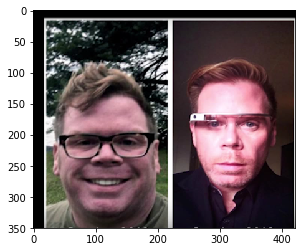

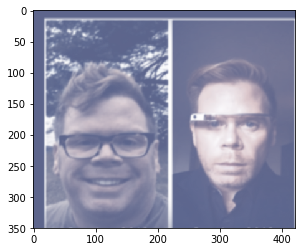

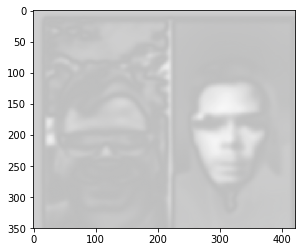

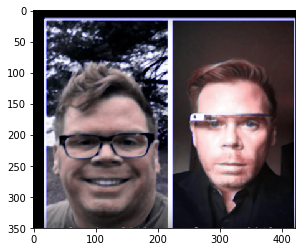

In [38]:
face = io.imread('images/face.png')

face_gaussian = ndimage.filters.gaussian_filter(face, 1)

face_gaussian_max = ndimage.filters.gaussian_filter(face, 4)

face_med = ndimage.filters.median_filter(face,size=3)

plt.imshow(face)
plt.show()

plt.imshow(face_gaussian)
plt.show()

plt.imshow(face_gaussian_max)
plt.show()

plt.imshow(face_med)
plt.show()

**(Optional)** Apply the smoothing on some other images and present their results.

### 2.3 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

Apply the different contour extraction tecniques introduced during the theory session (roberts, prewitt, sobel and canny). Also, find the optimal parameteres for each of them.

Use subplot and title to visualize the results.

Which is the best countour detection technique? 

Which are the optimal parameters for this image? 

Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

Hint: use skimage.feature.canny for applying the canny filter

Optional: Superimpose the contours over the image.

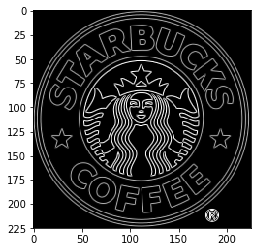

In [22]:
logo = io.imread('images/logo.png')
logo_gray = rgb2gray(logo)

edges_roberts = roberts(logo_gray)

plt.imshow(edges_roberts,cmap='gray')
plt.show()

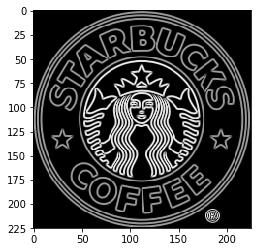

In [23]:
edges_sobel = sobel(logo_gray)
plt.imshow(edges_sobel,cmap='gray')
plt.show()

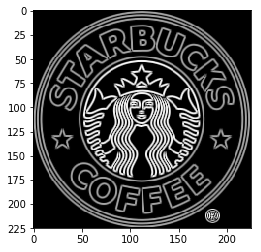

In [25]:
edges_prewitt = prewitt(logo_gray)
plt.imshow(edges_prewitt,cmap='gray')
plt.show()

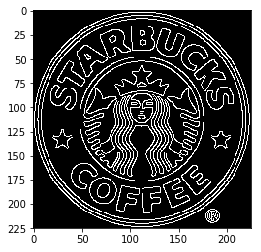

In [26]:
edges_canny = canny(logo_gray, sigma=0)
plt.imshow(edges_canny,cmap='gray')
plt.show()

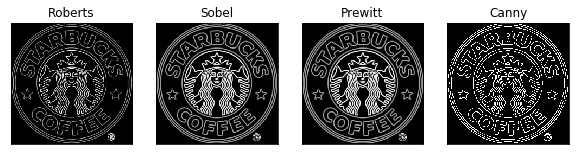

In [27]:
f, axarr = plt.subplots(1,4)
f.set_size_inches(10,10)

axarr[0].imshow(edges_roberts, cmap='gray')
axarr[0].set_title('Roberts')
axarr[0].xaxis.set_visible(False)
axarr[0].yaxis.set_visible(False)

axarr[1].imshow(edges_sobel, cmap='gray')
axarr[1].set_title('Sobel')
axarr[1].xaxis.set_visible(False)
axarr[1].yaxis.set_visible(False)

axarr[2].imshow(edges_prewitt,cmap='gray')
axarr[2].set_title('Prewitt')
axarr[2].xaxis.set_visible(False)
axarr[2].yaxis.set_visible(False)

axarr[3].imshow(edges_canny, cmap='gray')
axarr[3].set_title('Canny')
axarr[3].xaxis.set_visible(False)
axarr[3].yaxis.set_visible(False)

plt.show()

In [28]:
#Which is the best countour detection technique?

#Pels resultats, diriem que els dos mes semblants son Sobel o Prewit, son els dos molts semblants!


#Which are the optimal parameters for this image?

#Els definits per defecte creiem que son els mes adecuats. Pel cas de Canny, diriem que com mes petita la sigma millor.


#Is it necessary to normalize the mask as we do in the filtering applied for the smoothing?

#No, ara no fa falta, ja que no estem aplicant una convulsio

b)	Repeate the experiment with other images, you can use the ones included in the folder **images**. Comment if the parameters need to be changed for the different images.

- Are the contours improved if the image is previously smoothed ? 
- Which are the limitations of the different images contour extraction?

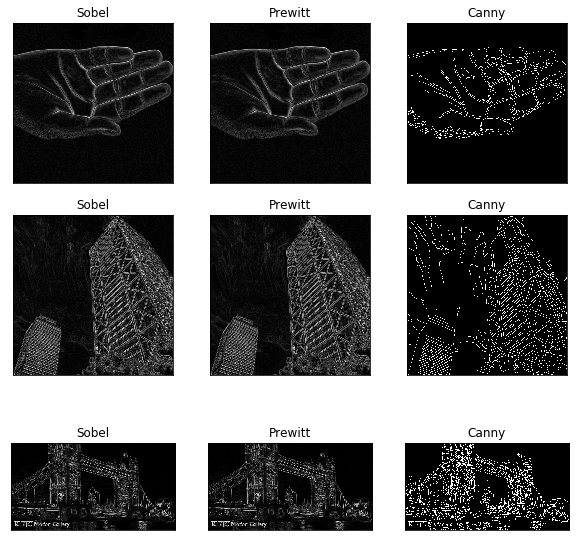

In [29]:
ma = io.imread('images/hand.jpg')
ma_gray = rgb2gray(ma)
mapfre = io.imread('images/mapfre.jpg')
mapfre_gray = rgb2gray(mapfre)
bridge = io.imread('images/bbc-hero-en.jpg')
bridge_gray = rgb2gray(bridge)


#Apliquem els 3 filtres
edges_sobel = sobel(ma_gray)
edges_prewitt = prewitt(ma_gray)
edges_canny = canny(ma_gray, sigma=1) #Per aquesta imatge va millor 1

mapfre_sobel = sobel(mapfre_gray)
mapfre_prewitt = prewitt(mapfre_gray)
mapfre_canny = canny(mapfre_gray, sigma=3) #i per aquesta en canvi necesita mes gran

bridges_sobel = sobel(bridge_gray)
bridges_prewitt = prewitt(bridge_gray)
bridges_canny = canny(bridge_gray, sigma=1) #Per aquesta imatge va millor 1



#Els mostrem
f, axarr = plt.subplots(3,3)
f.set_size_inches(10,10)

axarr[0][0].imshow(edges_sobel, cmap='gray')
axarr[0][0].set_title('Sobel')
axarr[0][0].xaxis.set_visible(False)
axarr[0][0].yaxis.set_visible(False)

axarr[0][1].imshow(edges_prewitt,cmap='gray')
axarr[0][1].set_title('Prewitt')
axarr[0][1].xaxis.set_visible(False)
axarr[0][1].yaxis.set_visible(False)

axarr[0][2].imshow(edges_canny, cmap='gray')
axarr[0][2].set_title('Canny')
axarr[0][2].xaxis.set_visible(False)
axarr[0][2].yaxis.set_visible(False)

axarr[1][0].imshow(mapfre_sobel, cmap='gray')
axarr[1][0].set_title('Sobel')
axarr[1][0].xaxis.set_visible(False)
axarr[1][0].yaxis.set_visible(False)

axarr[1][1].imshow(mapfre_prewitt,cmap='gray')
axarr[1][1].set_title('Prewitt')
axarr[1][1].xaxis.set_visible(False)
axarr[1][1].yaxis.set_visible(False)

axarr[1][2].imshow(mapfre_canny, cmap='gray')
axarr[1][2].set_title('Canny')
axarr[1][2].xaxis.set_visible(False)
axarr[1][2].yaxis.set_visible(False)

axarr[2][0].imshow(bridges_sobel,cmap="gray")
axarr[2][0].set_title('Sobel')
axarr[2][0].xaxis.set_visible(False)
axarr[2][0].yaxis.set_visible(False)


axarr[2][1].imshow(bridges_prewitt,cmap='gray')
axarr[2][1].set_title('Prewitt')
axarr[2][1].xaxis.set_visible(False)
axarr[2][1].yaxis.set_visible(False)

axarr[2][2].imshow(bridges_canny, cmap='gray')
axarr[2][2].set_title('Canny')
axarr[2][2].xaxis.set_visible(False)
axarr[2][2].yaxis.set_visible(False)


plt.show()

In [30]:
#Are the contours improved if the image is previously smoothed ?

#No, com mes contrast millor



#Which are the limitations of the different images contour extraction?

#Que com menys contrast, menys canvis bruscos, menys podem trobar aquests edges

d) Optional: How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


### 2.4 Applying smoothing in order to obtain hybrid images

a) Given `Einstein.jpg` and `monroe.jpg` images, compute the hybrid image and visualize it.

By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

Hybrid (I1, I2) = L(I1) + H(I2)

Apply fspecial('gaussian,hsize,sigma') with the formula hsize=4*sigma+1. What does hsize mean?

Hint: In order to highlight the effect, in the L(I1) image you should define a lower sigma, while for the H(I1) you should use a higher one. 

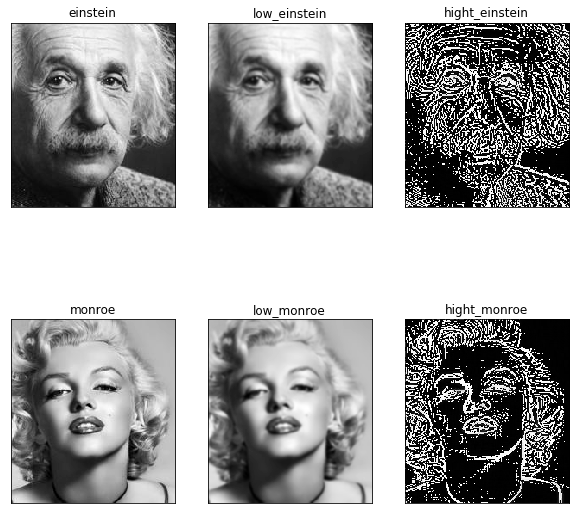

In [33]:
einstein = io.imread('images/Einstein.jpg')
monroe = io.imread('images/monroe.jpg')

low_einstein = ndimage.filters.gaussian_filter(einstein, sigma=1)
low_monroe = ndimage.filters.gaussian_filter(monroe, sigma=1)

hight_einstein = einstein - low_einstein
hight_monroe = monroe - low_monroe

f, axarr = plt.subplots(2,3)
f.set_size_inches(10,10)

axarr[0][0].imshow(einstein, cmap='gray')
axarr[0][0].set_title('einstein')
axarr[0][0].xaxis.set_visible(False)
axarr[0][0].yaxis.set_visible(False)

axarr[0][1].imshow(low_einstein,cmap='gray')
axarr[0][1].set_title('low_einstein')
axarr[0][1].xaxis.set_visible(False)
axarr[0][1].yaxis.set_visible(False)

axarr[0][2].imshow(hight_einstein, cmap='gray')
axarr[0][2].set_title('hight_einstein')
axarr[0][2].xaxis.set_visible(False)
axarr[0][2].yaxis.set_visible(False)

axarr[1][0].imshow(monroe, cmap='gray')
axarr[1][0].set_title('monroe')
axarr[1][0].xaxis.set_visible(False)
axarr[1][0].yaxis.set_visible(False)

axarr[1][1].imshow(low_monroe,cmap='gray')
axarr[1][1].set_title('low_monroe')
axarr[1][1].xaxis.set_visible(False)
axarr[1][1].yaxis.set_visible(False)

axarr[1][2].imshow(hight_monroe, cmap='gray')
axarr[1][2].set_title('hight_monroe')
axarr[1][2].xaxis.set_visible(False)
axarr[1][2].yaxis.set_visible(False)

plt.show()

b) Combine both hybrid images and visualize them. Analyze which is the best way of showing it if our aim is to see Marylin Monroe. Additionally, rescale the image to different size and comment the results. Present the different visualizations of the experiment performed.

Optional : compute hybrid images from other images. Apply it over color images.

D:\Programas\Anaconda\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


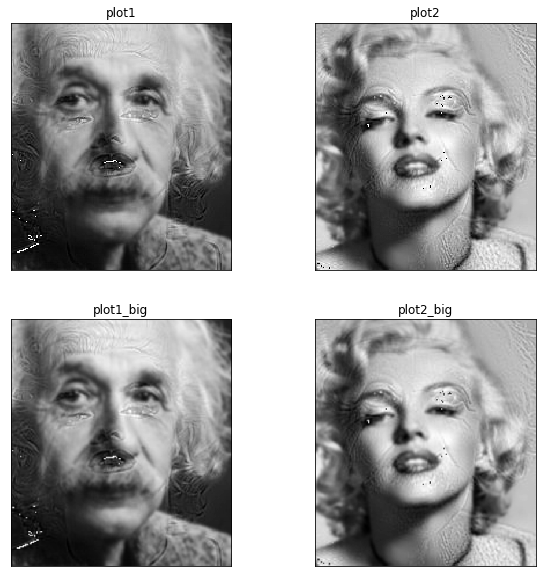

In [36]:
plot1 = low_einstein + hight_monroe
plot2 = low_monroe + hight_einstein

shape1 = (plot1.shape[0]*2,plot1.shape[1]*2)
plot1_big = resize(plot1, shape1, mode='reflect')

shape2 = (plot2.shape[0]*2,plot2.shape[1]*2)
plot2_big = resize(plot2, shape2, mode='reflect')

f, axarr = plt.subplots(2,2)
f.set_size_inches(10,10)

axarr[0][0].imshow(plot1, cmap='gray')
axarr[0][0].set_title('plot1')
axarr[0][0].xaxis.set_visible(False)
axarr[0][0].yaxis.set_visible(False)

axarr[0][1].imshow(plot2, cmap='gray')
axarr[0][1].set_title('plot2')
axarr[0][1].xaxis.set_visible(False)
axarr[0][1].yaxis.set_visible(False)

axarr[1][0].imshow(plot1_big, cmap='gray')
axarr[1][0].set_title('plot1_big')
axarr[1][0].xaxis.set_visible(False)
axarr[1][0].yaxis.set_visible(False)

axarr[1][1].imshow(plot2_big, cmap='gray')
axarr[1][1].set_title('plot2_big')
axarr[1][1].xaxis.set_visible(False)
axarr[1][1].yaxis.set_visible(False)

plt.show()

In [37]:
#1. Analyze which is the best way of showing it if our aim is to see Marylin Monroe.
#La millor manera de que es vegi Monroe es aplicant a la seva imatge el low_pass.

## 2.5 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg



In [56]:
#Utilitzar per fer reset, o canviar de plugin
%matplotlib inline

<IPython.core.display.Javascript object>


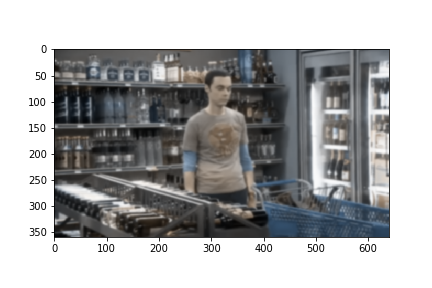

In [60]:
ic = io.ImageCollection('images/bigbangcollection/*.png')
# Reading a sequence of images from a folder

frames = []
for i in range(len(ic)):
    gaussian_frame = scipy.ndimage.filters.gaussian_filter(ic[i], 1.5)
    frames.append(gaussian_frame)

import matplotlib.animation as animation
%matplotlib nbagg 
#Changing the pluggin is necessary always when visualizing a video!

i=0       #Inicializing the video display
fig = plt.figure()  # Create figure
im = plt.imshow(frames[i], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(frames[i]) #Changing the content of the canvas
    return im, #to return a tuple!

ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=False, frames=200, repeat= False) 

## Delivery

Compressed file **P2_Student1_Student2.zip** that includes:
- The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used that are not provided in P2.zip.

**Deadline (Campus Virtual): October 15, 11:00 p.m.** 
